<a href="https://colab.research.google.com/github/Th-Three/datascience_projects/blob/main/python%20project/Store%20Item%20Demand%20Forecasting%3A%20Time%20Series%20Analysis/%5BThanaphop%5DTime_series_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Time series analysis

**Date:** 24 September 2024\
**Author:** Thanaphop Threethipthikoon\
**Objective:** To predict 3 months of item-level sales data at different store locations.\
**Dataset source at**: https://www.kaggle.com/c/demand-forecasting-kernels-only/data


# Exploratory Data Analysis

1. Check the dataset
    - Find the size
    - Check if there is any missing value

2. Data Analysis part
    - See the distribution of data
    - Find Yearly and Monthly sales
    - Find total sales by store and by item
    - Find the pattern in data for trends and seasonal factors

In [ ]:
#Import the essential library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.head())
print(df_train.shape) #it should be (91300,4)
print(df_test.head())
print(df_test.shape) #it should be (45000, 4)


         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
(913000, 4)
   id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1
(45000, 4)


In [ ]:
#check null value from df_train
df_train.isnull().sum() #should contained 0 na

,0
date,0
store,0
item,0
sales,0


The dataset train.csv has 913k rows and 4 columns

The dataset test.csv has 45k rows and 4 columns

All dataset has no null/missing value.

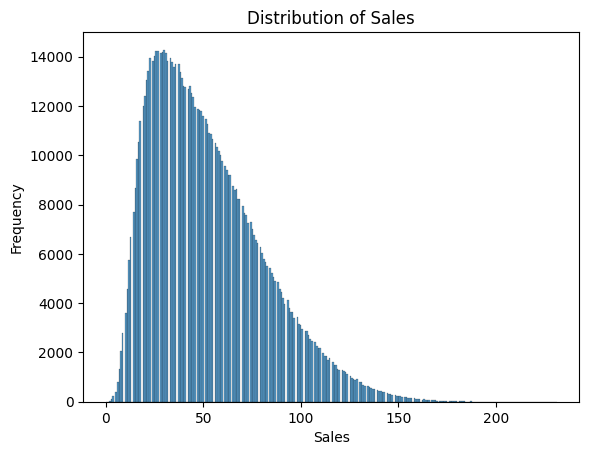

The median sales is 47.0
The mean sales is 52.25
The min sales is 0
The max sales is 231


In [ ]:
#create a histogram of sales distribution data
sns.histplot(df_train['sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

#print the median of sales
print(f"The median sales is {df_train['sales'].median()}")

#print the mean of sales in 2 decimal point
print(f"The mean sales is {df_train['sales'].mean():.2f}")

#print the min and max of sales
print(f"The min sales is {df_train['sales'].min()}")
print(f"The max sales is {df_train['sales'].max()}")

The distribution of sales is right-skewed and all has range from 0 to 231.

The median is at 47

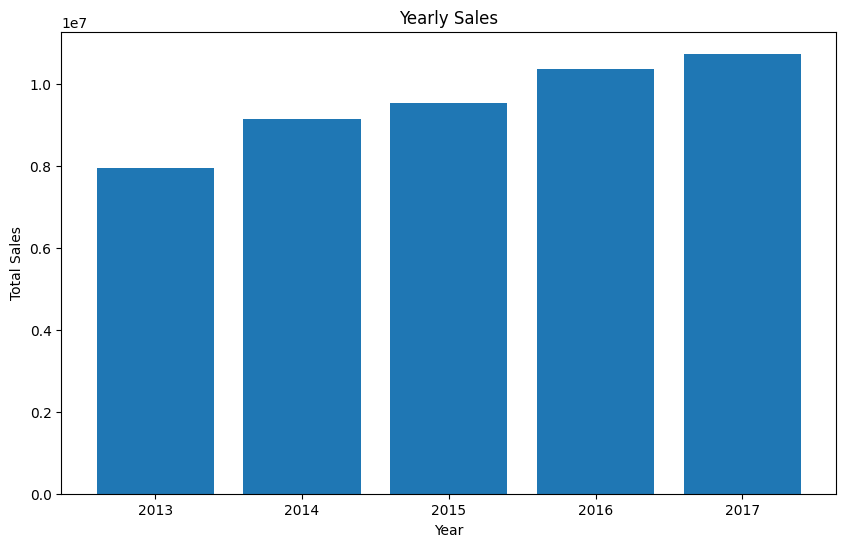

In [ ]:
# prompt: create a bar plot of yearly sales

# Convert 'date' column to datetime objects
df_train['date'] = pd.to_datetime(df_train['date'])

# Extract year from the date
df_train['year'] = df_train['date'].dt.year

# Group by year and calculate total sales for each year
yearly_sales = df_train.groupby('year')['sales'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
plt.show()


The total sales increases over the year.

<ipython-input-8-27b1730b0a44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['month'] = df_2017['date'].dt.month


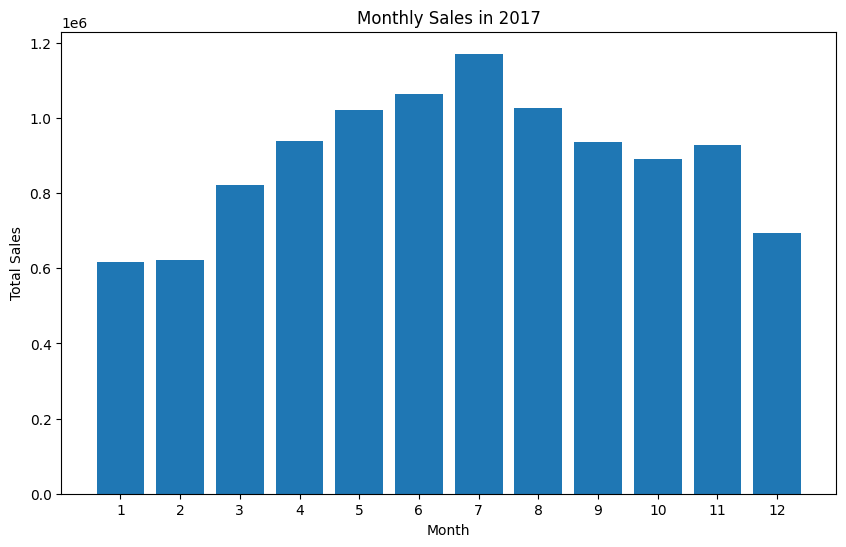

In [ ]:
# create a bar plot showing the monthly sales in 2017

# Filter data for the year 2017
df_2017 = df_train[df_train['year'] == 2017]

# Extract month from the date
df_2017['month'] = df_2017['date'].dt.month

# Group by month and calculate total sales for each month
monthly_sales_2017 = df_2017.groupby('month')['sales'].sum()

# Sort monthly sales in ascending order
monthly_sales_2017_sorted = monthly_sales_2017.sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2017_sorted.index, monthly_sales_2017_sorted.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
#x tick mark for every month
plt.xticks(range(1, 13))
plt.title('Monthly Sales in 2017')
plt.show()


The sales is highest in July with the data from the year 2017

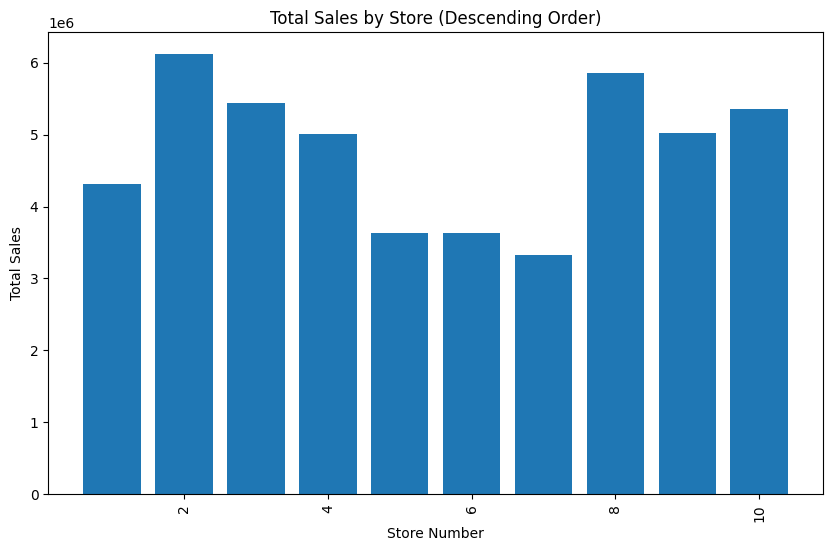

,sales
store,
2,6120128
8,5856169
3,5435144
10,5360158
9,5025976


In [ ]:
# Create a bar chart to find the highest sales count store

# Group by store_nbr and calculate total sales for each store
store_sales = df_train.groupby('store')['sales'].sum()

# Sort store sales in descending order
store_sales_sorted = store_sales.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(store_sales_sorted.index, store_sales_sorted.values)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store (Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

store_sales_sorted.head(5)

The store no. 2 has the highest sales.

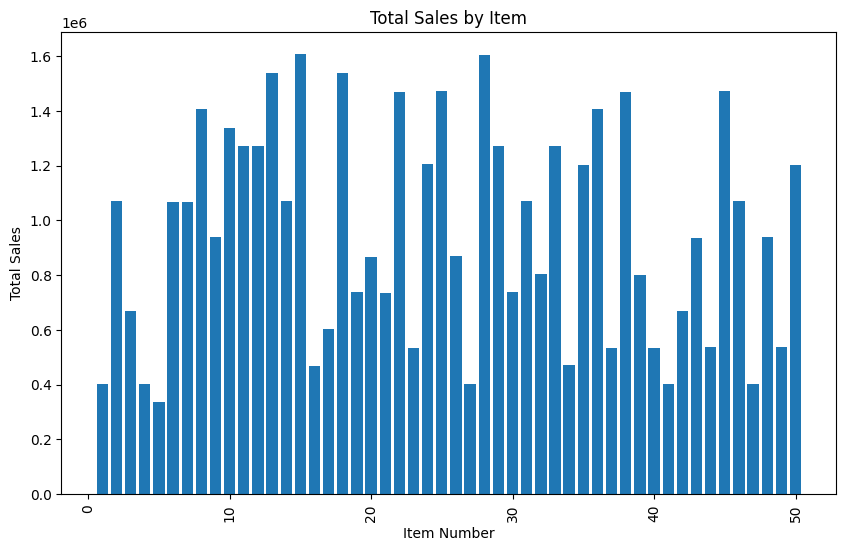

,sales
item,
15,1607442
28,1604713
13,1539621
18,1538876
25,1473334


In [ ]:
# Create a bar chart to show the sales group by item
# Group by item_nbr and calculate total sales for each item
item_sales = df_train.groupby('item')['sales'].sum()

# Sort item sales in descending order (highest to lowest)
item_sales_sorted = item_sales.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(item_sales_sorted.index, item_sales_sorted.values)
plt.xlabel('Item Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

item_sales_sorted.head(5)

The item no. 10 has the highest sales.

In [ ]:
#try pivot table to show average of each item sales in each store
AvgSalestable = pd.pivot_table(df_train, values='sales', index=['item'], columns=['store'], aggfunc=np.mean)
display(AvgSalestable.head(10))

<ipython-input-122-adee5a60ad84>:2: FutureWarning: The provided callable <function mean at 0x798096b1c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  AvgSalestable = pd.pivot_table(df_train, values='sales', index=['item'], columns=['store'], aggfunc=np.mean)


store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,19.971522,28.173604,25.070099,22.938664,16.739321,16.717963,15.159365,26.983571,23.325849,24.736035
2,53.148959,75.316539,66.804491,61.715225,44.488499,44.533954,40.717963,71.656627,61.792442,65.566813
3,33.208105,46.992333,41.771084,38.548193,27.835706,27.811062,25.531216,45.076123,38.535049,41.113363
4,19.956188,28.234940,25.116101,23.086528,16.776561,16.754107,15.358160,26.948521,23.150055,24.721249
5,16.612815,23.540526,20.857612,19.525192,14.086528,13.893209,12.733844,22.427711,19.272180,20.637459
6,53.060789,74.945235,67.007119,61.270537,44.564622,44.503834,40.703724,71.958379,61.412377,65.612267
7,52.783680,75.058598,66.647864,61.625411,44.535597,44.599124,40.709748,71.730559,61.812158,65.807777
8,69.472070,99.090361,87.517525,80.819825,58.565717,58.385542,53.723987,94.461117,81.287514,86.176889
9,46.504929,65.478094,58.486857,54.043812,38.837349,39.460022,35.901972,63.193319,54.105696,57.886637


In [ ]:
#Prepare the data
#try data from store 1 item 1, where x = date and y = sales. We want to predict the sales.
try_store = 1
try_item = 1
try_start_date = '2013-01-01'
try_end_date = '2017-12-31'

store1_x = df_train[(df_train['store'] == try_store) & (df_train['item'] == try_item) & (df_train['date'] >= try_start_date) & (df_train['date'] <= try_end_date)]['date']
store1_y = df_train[(df_train['store'] == try_store) & (df_train['item'] == try_item) & (df_train['date'] >= try_start_date) & (df_train['date'] <= try_end_date)]['sales']
print(store1_x)
print(store1_y)

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1821   2017-12-27
1822   2017-12-28
1823   2017-12-29
1824   2017-12-30
1825   2017-12-31
Name: date, Length: 1826, dtype: datetime64[ns]
0       13
1       11
2       14
3       13
4       10
        ..
1821    14
1822    19
1823    15
1824    27
1825    23
Name: sales, Length: 1826, dtype: int64


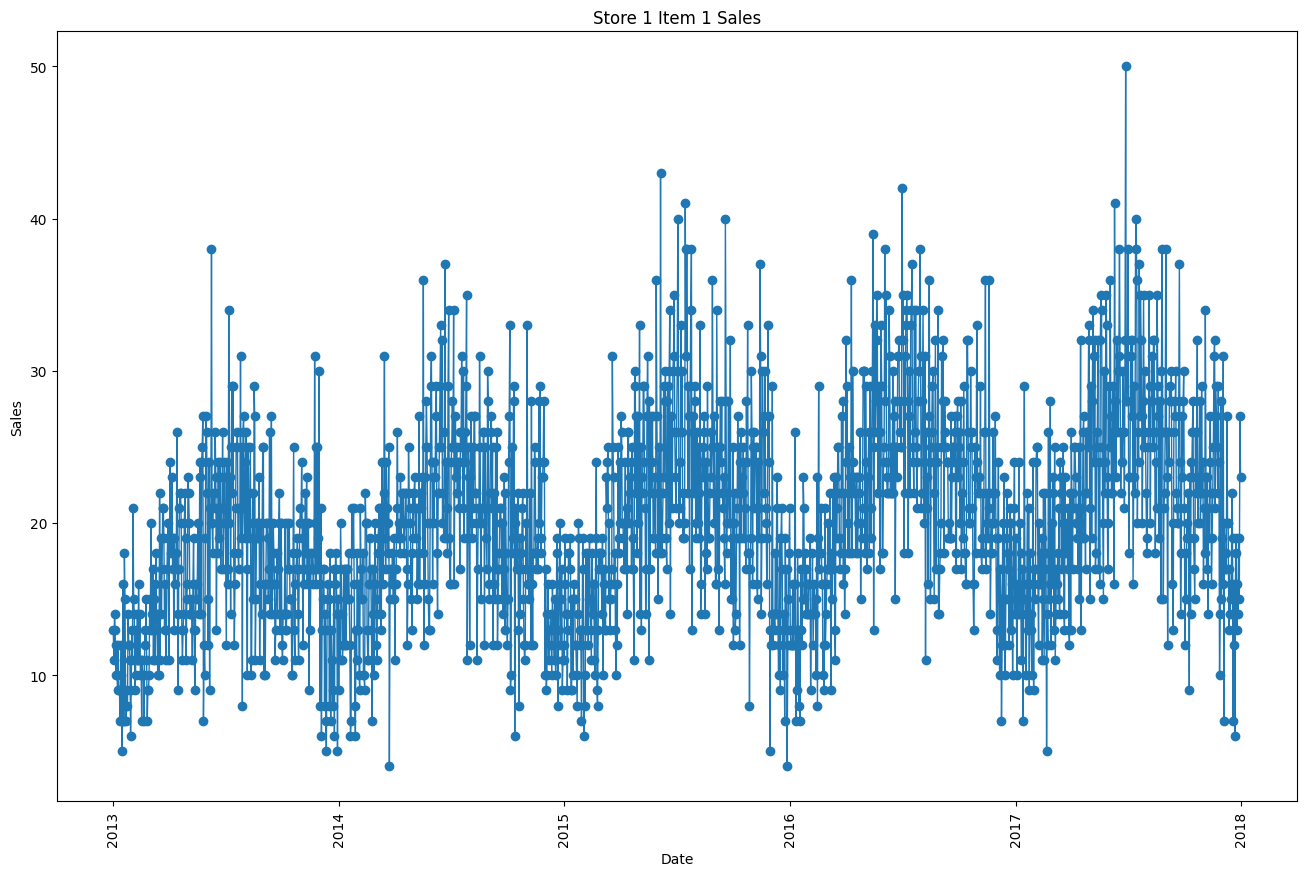

In [ ]:
#Visualize the data

xtickslen = 90

#plot the select value, where x is date and y is sales.
plt.scatter(store1_x, store1_y)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Store {try_store} Item {try_item} Sales')
plt.xticks(rotation=90)
#set size of plot to 1600×900
plt.gcf().set_size_inches(1600/100, 1000/100)
#fill in the line between the scatter plot
plt.plot(store1_x, store1_y, linewidth=1)
plt.show()

The scatter chart shows the trend of sales that increases over the year and there are some seasonal trend occurs yearly.

#Simple Linear Regression
This is the baseline model to establish a benchmark. We use this model to compare the performance with other models.

In [ ]:
#Import the essential library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the .csv files and prepare the file
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape) #it should be (91300,4)
print(df_test.shape) #it should be (45000, 4)

(913000, 4)
(45000, 4)


In [ ]:
#import package for the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#Step 2 Prepare the dataset
#select data from store 1 item 1
selected_store = 1
selected_item = 1

#prepare the date
selected_start_date = '2013-01-01'
selected_end_date = '2017-12-31'

#use the date as input and sale as output
selected_store_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['date']
selected_store_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['sales']

#create sales_data as dataframe from selected_store_date and selected_store_sales
sales_data = {'date': selected_store_date, 'sales': selected_store_sales}
#convert into pandas's dataframe
sales_data=pd.DataFrame(sales_data)
#correcte the date into datetime type
sales_data['date']=pd.to_datetime(sales_data['date'])

#Step 3: Extracting monthly sales
#Let’s extract monthly sales first
dfresample1 = sales_data.set_index('date')

#get the mean of each month sales
mean_sales = dfresample1.resample('M').mean()

#see the preview to monthly_sales
mean_sales.head()



<ipython-input-20-2edae8994777>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_sales = dfresample1.resample('M').mean()


,sales
date,
2013-01-31,10.580645
2013-02-28,11.500000
2013-03-31,15.387097
2013-04-30,17.400000
2013-05-31,17.129032


**Warning of Splitting Data**

When dealing with time series data, a straightforward train-test split can lead to data leakage. This is because future data points can influence the model's predictions for past data.

I decided to use data from 2013 to 2016 as train set and 2017 as test set.

In [ ]:
#Split mean_sales to train_mean_sales and test_mean_sales
#train_mean_sales is data from 2013 to 2016 and test is 2017
train_mean_sales = mean_sales[mean_sales.index.year <= 2016]
test_mean_sales = mean_sales[mean_sales.index.year == 2017]
#Assign index of train_mean_sales to X_train
X_train = train_mean_sales.index.values.astype(np.int64) // 10**9  # Convert dates to numerical representation (seconds)
X_train = X_train.reshape(-1, 1)
#Assign the test_mean_sales_ to X_test
X_test = test_mean_sales.index.values.astype(np.int64) // 10**9  # Convert dates to numerical representation (seconds)
X_test = X_test.reshape(-1, 1)

#Assign sales to y
y_train = train_mean_sales['sales'].values
y_test  = test_mean_sales['sales'].values

# Create a linear regression model
LRmodel = LinearRegression()

# Train the model
LRmodel.fit(X_train, y_train)

# Make predictions
y_pred = LRmodel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error: ", mae)
print("R-squared:", r2)


Mean Squared Error: 19.837945791699735
Mean Absolute Error:  3.7049862157719926
R-squared: -0.1519154923121946


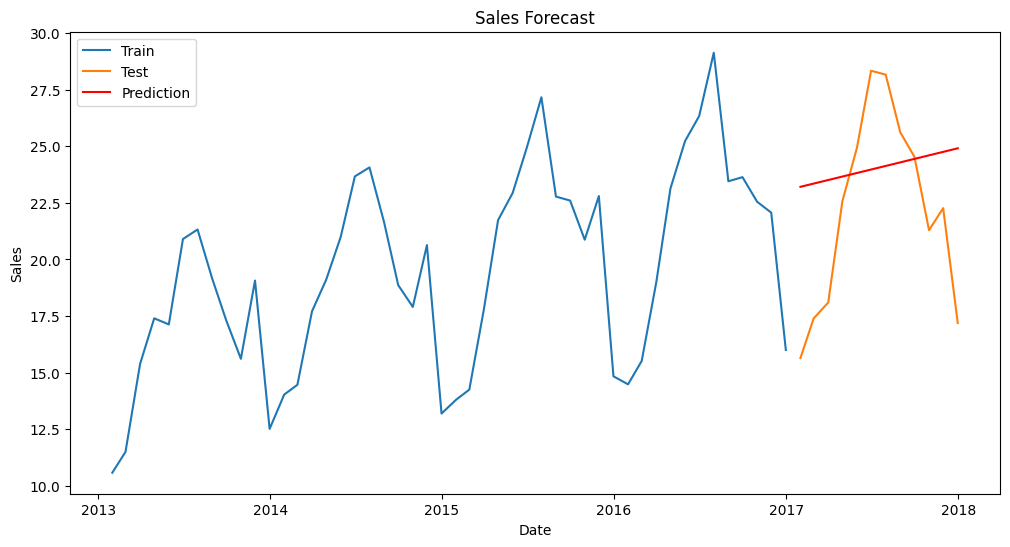

In [ ]:
#Visualize the dataset

#plot the sales of y_train and y_test
plt.figure(figsize=(12, 6))
plt.plot(train_mean_sales.index, train_mean_sales['sales'], label='Train')
plt.plot(test_mean_sales.index, test_mean_sales['sales'], label='Test')
#plot the prediction over the chart
plt.plot(test_mean_sales.index, y_pred, color='red', label='Prediction')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()



We saw that the simple linear regression was not suitable when face with seasonality and trends in data.

The next step, I would like to apply the transformation to target variable (y) before training the model.

Mean Squared Error: 0.04585980396139294
Mean Absolute Error:  0.17184166593769198
R-squared: -0.2324806222381477


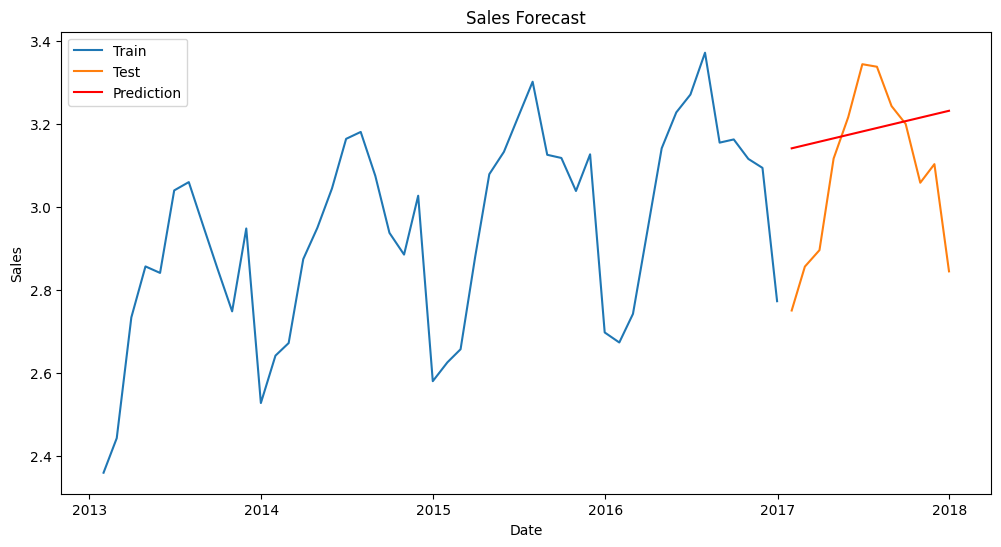

In [ ]:
#Apply the log transformation to y and y_test
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

#train the new model
LRmodel.fit(X_train, y_train_log)

# Make predictions
y_pred_log = LRmodel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
r2 = r2_score(y_test_log, y_pred_log)
print("Mean Squared Error:", mse)
print("Mean Absolute Error: ", mae)
print("R-squared:", r2)

#Visualize the dataset
#plot the sales of y_train_log and y_test_log
plt.figure(figsize=(12, 6))
plt.plot(train_mean_sales.index, y_train_log, label='Train')
plt.plot(test_mean_sales.index, y_test_log, label='Test')
#plot the prediction over the chart
plt.plot(test_mean_sales.index, y_pred_log, color='red', label='Prediction')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

The log transform variable show that the prediction was still affected by the seasonality and trends.

Mean Squared Error: 11.587685777692158
Mean Absolute Error:  2.8889625152579783
R-squared: -0.05144371640246881


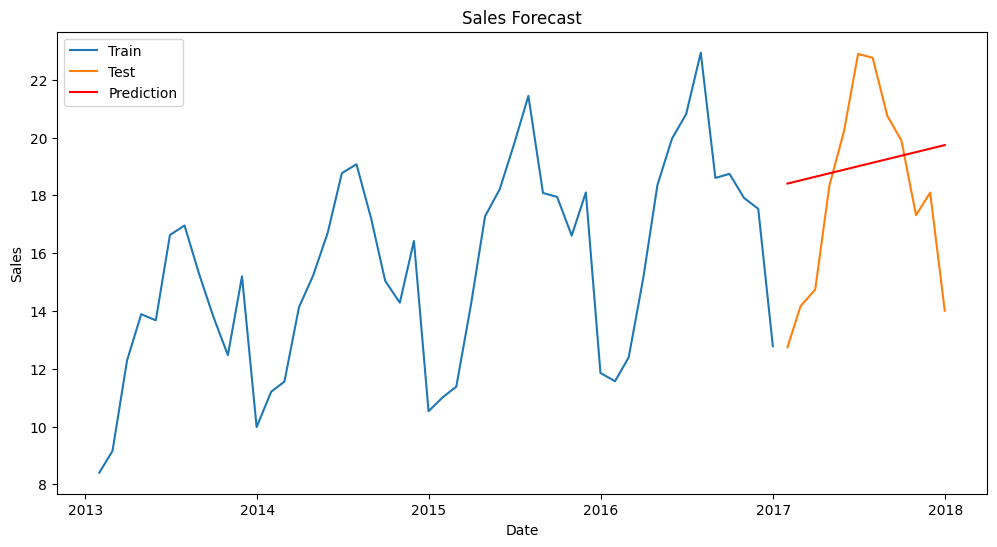

In [ ]:
#apply the box-cox transformation
from scipy.stats import boxcox
y_train_boxcox, lambda_train = boxcox(y_train)
y_test_boxcox, lambda_test = boxcox(y_test)

#train the new model for boxcox
LRmodel.fit(X_train, y_train_boxcox)

# Make predictions
y_pred_boxcox = LRmodel.predict(X_test)

#Evaluate model
mse = mean_squared_error(y_test_boxcox, y_pred_boxcox)
mae = mean_absolute_error(y_test_boxcox, y_pred_boxcox)
r2 = r2_score(y_test_boxcox, y_pred_boxcox)
print("Mean Squared Error:", mse)
print("Mean Absolute Error: ", mae)
print("R-squared:", r2)

#Visualize the dataset
#plot the sales of y_train_log and y_test_log
plt.figure(figsize=(12, 6))
plt.plot(train_mean_sales.index, y_train_boxcox, label='Train')
plt.plot(test_mean_sales.index, y_test_boxcox, label='Test')
#plot the prediction over the chart
plt.plot(test_mean_sales.index, y_pred_boxcox, color='red', label='Prediction')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

Yet, again. The box-cox transformation is not working. Let's try the differencing transformation.


Mean Squared Error: 7.724180728644476
Mean Absolute Error:  2.364144911142007
R-squared: -0.08581198479067909


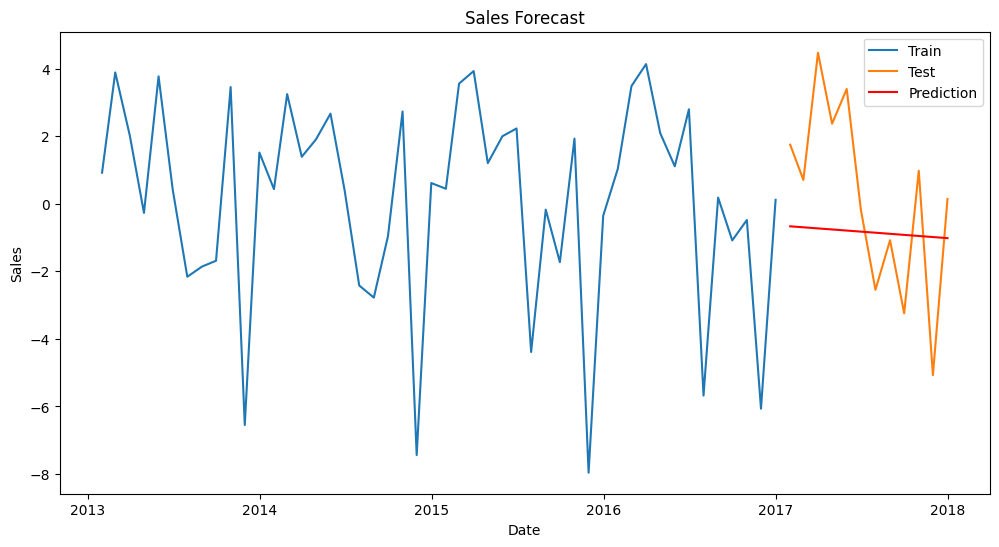

In [ ]:
#Apply differencing to the y
y_train_diff = np.diff(y_train)
y_test_diff = np.diff(y_test)

#append y_train_diff with its mean
y_train_diff = np.append(y_train_diff, np.mean(y_train_diff))
y_test_diff = np.append(y_test_diff, np.mean(y_test_diff))

#train the new model with differenncing
LRmodel.fit(X_train, y_train_diff)

# Make predictions
y_pred_diff = LRmodel.predict(X_test)

#Evaluate model
mse = mean_squared_error(y_test_diff, y_pred_diff)
mae = mean_absolute_error(y_test_diff, y_pred_diff)
r2 = r2_score(y_test_diff, y_pred_diff)
print("Mean Squared Error:", mse)
print("Mean Absolute Error: ", mae)
print("R-squared:", r2)

#Visualize the dataset
#plot the sales of y_train_log and y_test_log
plt.figure(figsize=(12, 6))
plt.plot(train_mean_sales.index, y_train_diff, label='Train')
plt.plot(test_mean_sales.index, y_test_diff, label='Test')
#plot the prediction over the chart
plt.plot(test_mean_sales.index, y_pred_diff, color='red', label='Prediction')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

The differencing was also not optimal in default. We can see that the increasing trend was diminished. However, the seasonal pattern although transformed was still remain throughout the years. At this stage, We could try more multiple transformations or move on to another model that is better at dealing this type of data.

#SARIMA
First ML to apply on this dataset I choose SARIMA

source: https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

You can start running the code from here.

In [1]:
#Import the essential library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the .csv files and prepare the file
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape) #it should be (91300,4)
print(df_test.shape) #it should be (45000, 4)

(913000, 4)
(45000, 4)


In [2]:
#Step 1 import libraries for SARIMA
#Import the nescessary libraries for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
#Function for check the stationary
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

**Check Stationarity**

Before applying SARIMA, check if the time series data is stationary because SARIMA assumes that the time series data is stationary. Stationarity refers to the ***statistical properties of a time series remaining constant over time***, such as **constant mean**, **constant variance**, and **constant autocovariance**. Here, I use the Dickey-Fuller test for this.

Perform the ADF Test: Inside the function, it calls the adfuller function on the timeseries. The autolag=’AIC’ parameter specifies that the lag order should be chosen based on the Akaike Information Criterion (AIC).
Retrieve the p-Value: It extracts the p-value from the ADF test result, which is stored in the variable p_value.
Print the Results: It prints the ADF Statistic (result[0]), the p-value (p_value), and a statement indicating whether the time series is stationary or non-stationary based on the p-value. If the p-value is less than 0.05, it considers the series as “Stationary”; otherwise, it’s labeled as “Non-Stationary.”
Check Stationarity of sales: The function is then called with the sales time series data, which is assumed to be the monthly sales data.

source of the function from https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

<ipython-input-5-85cc7e6fec1e>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = train_resample.resample('M').mean()
<ipython-input-5-85cc7e6fec1e>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_monthly_sales = test_resample.resample('M').mean()


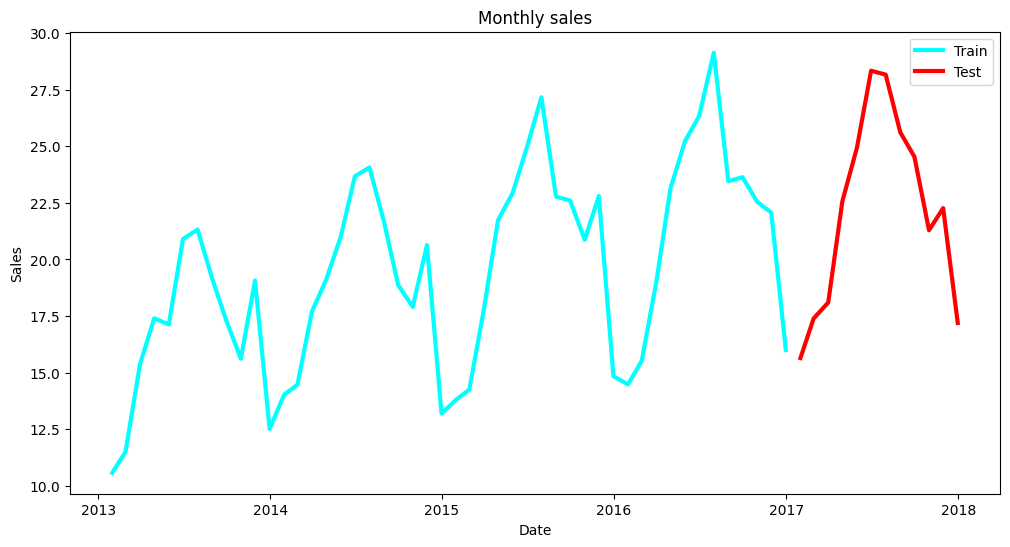

ADF Statistic: -0.9117003919915005
p-value: 0.7840948944704617
Non-Stationary


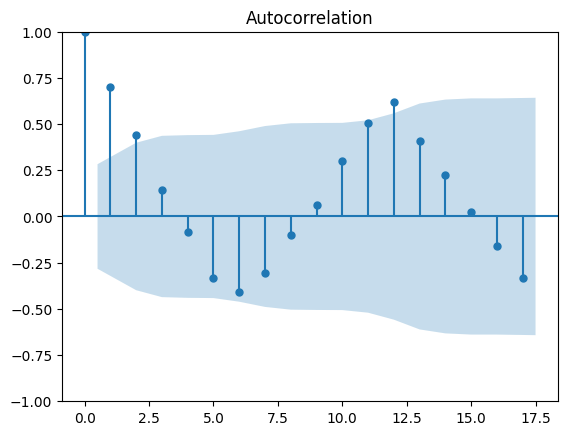

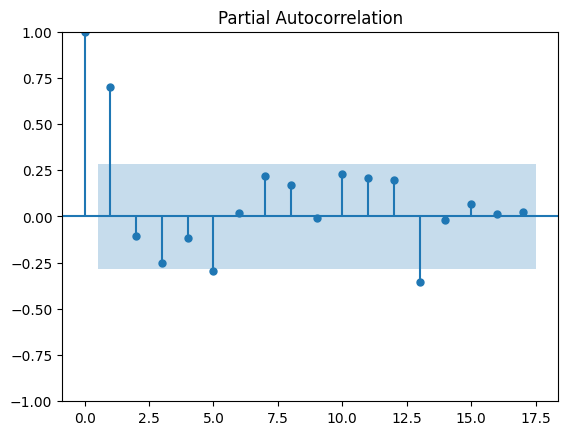

In [ ]:
#Step 2 Prepare the dataset
#select data from store 1 item 1
selected_store = 1
selected_item = 1
selected_start_date = '2013-01-01'
selected_end_date = '2016-12-31'
selected_test_startdate = '2017-01-01'
selected_test_enddate = '2017-12-31'
#use the date as input and sale as output
selected_store_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['date']
selected_store_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['sales']
selected_store_test_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_test_startdate) & (df_train['date'] <= selected_test_enddate)]['date']
selected_store_test_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_test_startdate) & (df_train['date'] <= selected_test_enddate)]['sales']

#Training data--------------------------------------------
#create train_sales_data as dataframe from selected_store_date and selected_store_sales
train_sales_data = {'date': selected_store_date, 'sales': selected_store_sales}
#convert into pandas's dataframe
train_sales_data=pd.DataFrame(train_sales_data)
#correct the date into datetime type
train_sales_data['date']=pd.to_datetime(train_sales_data['date'])

#get monthly sales data for train
train_resample = train_sales_data.set_index('date')
monthly_sales = train_resample.resample('M').mean()

#Testing data---------------------------------------------
test_sales_data = {'date': selected_store_test_date, 'sales': selected_store_test_sales}
#convert into pandas's dataframe
test_sales_data = pd.DataFrame(test_sales_data)
#correct the date into datetime type
test_sales_data['date']=pd.to_datetime(test_sales_data['date'])

#get monthly sales data for test
test_resample = test_sales_data.set_index('date')
test_monthly_sales = test_resample.resample('M').mean()

#plot to see the monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['sales'], linewidth=3,c='cyan', label='Train')
plt.plot(test_monthly_sales['sales'],linewidth=3,c='red',label='Test')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

#check stationarity
check_stationarity(monthly_sales['sales'])

#see the ACF and PACF plot
plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()


In [ ]:
#full ADF test results
adfuller(monthly_sales['sales'], autolag='AIC')

(-0.9117003919915005,
 0.7840948944704617,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 169.60215963757565)

The data is non-stationary.

We could apply one of the transformation methods (eg. Log transform, Power Transform, Differencing). However, the transform method may

In [ ]:
#The data is non-stationary.


Step 7 Identify Model Parameters

Identify the SARIMA model parameters (p, d, q, P, D, Q, s) using ACF and PACF plots.

- **ACF Plot**: This function generates an ACF plot, which is a plot of **autocorrelations** of the differenced time series. Autocorrelation measures the **relationship** between **a data point and previous data points at different lags**.
- **PACF Plot**: This function generates a PACF plot, which is a plot of **partial autocorrelations** of the differenced time series. Partial autocorrelation represents the correlation between **a data point and a lag while adjusting for the influence of other lags**.

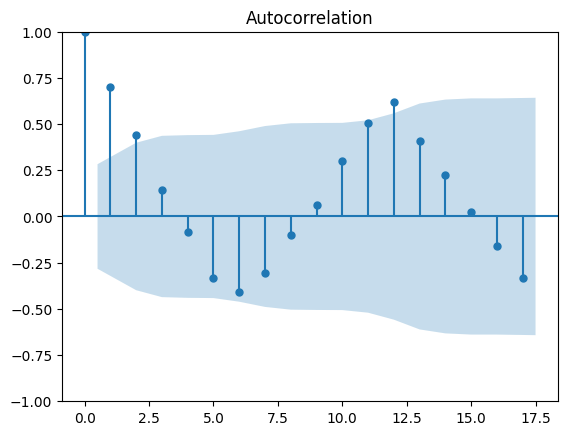

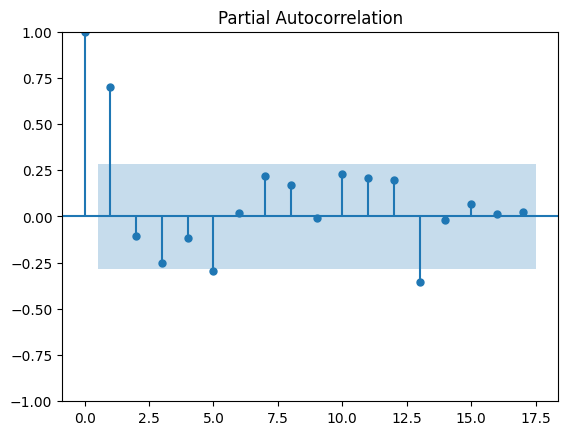

In [ ]:
#From above results our dataset is stationary

#Step 7 Identify Model Parameters
#Identify the SARIMA model parameters (p, d, q, P, D, Q, s) using ACF and PACF plots.
plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()

Here, both plots have a horizontal axis that shows the lags, and a vertical axis representing correlation coefficients ranging from -1 to 1 where -1 means perfect negative correlation, 0 means no correlation and 1 means perfect positive correlation.

The blue shaded area represents confidence interval for the correlation coefficients. If the correlation coefficient at a certain lag is outside the confidence interval, it means that the correlation coefficient is statistically significant and not due to chance.

In [ ]:
#step 8 fit the SARIMA Model
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#print results information
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -50.141
Date:                            Wed, 11 Dec 2024   AIC                            110.282
Time:                                    08:45:55   BIC                            118.058
Sample:                                01-31-2013   HQIC                           112.966
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2666      0.347     -0.768      0.443      -0.947       0.414
ma.L1         -0.3050      0.362   

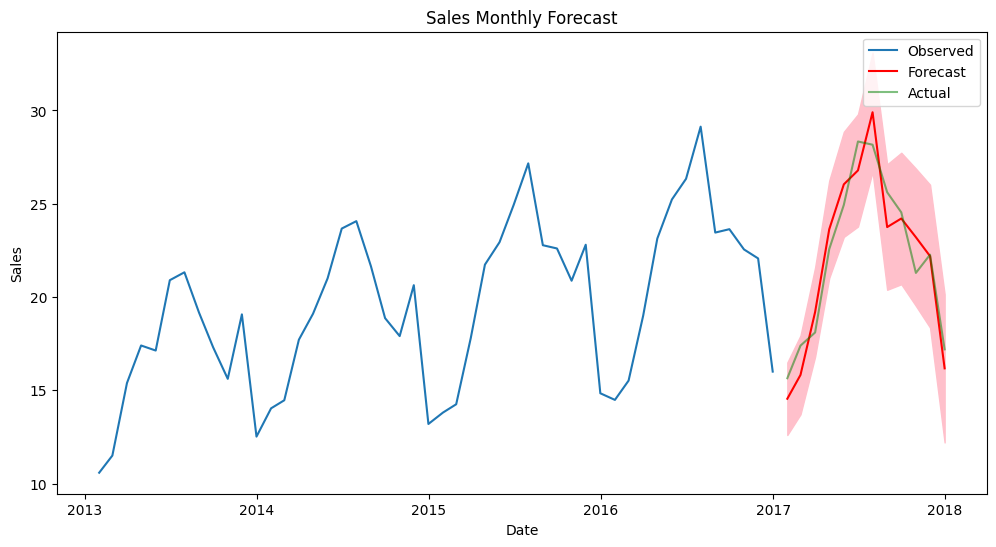

In [ ]:
#step 9 generate forcast

# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.plot(test_monthly_sales, label='Actual', color='green', alpha=0.5)
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Monthly Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
#Evalutation Metrics
observed = monthly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
r2 = r2_score(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.40865307619612007
MSE: 0.22686329627263105
R2: 0.9881058357344213


Monthly sales predict with SARIMA
- MAE: 0.40865307619612007
- MSE: 0.22686329627263105
- R2: 0.9881058357344213

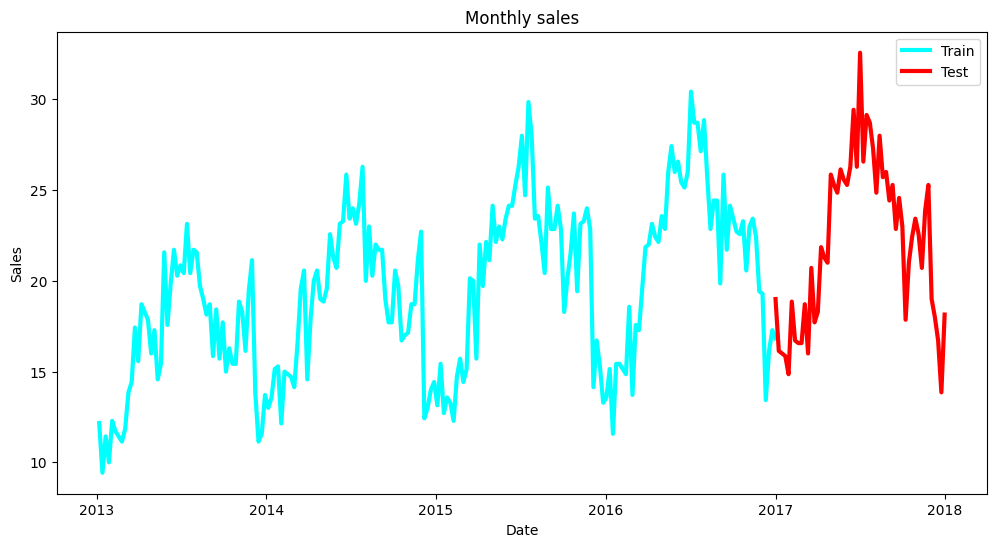

ADF Statistic: -2.8933144795360044
p-value: 0.0461309742884519
Stationary


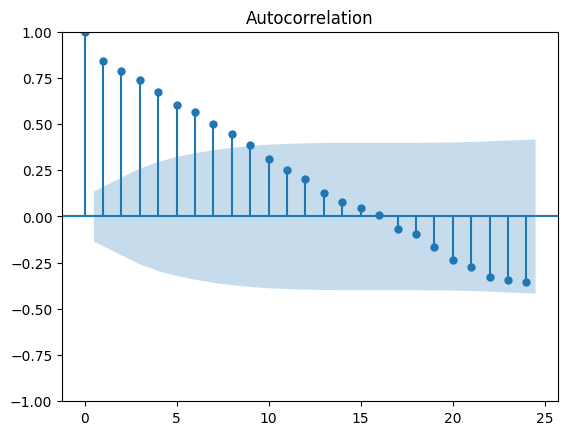

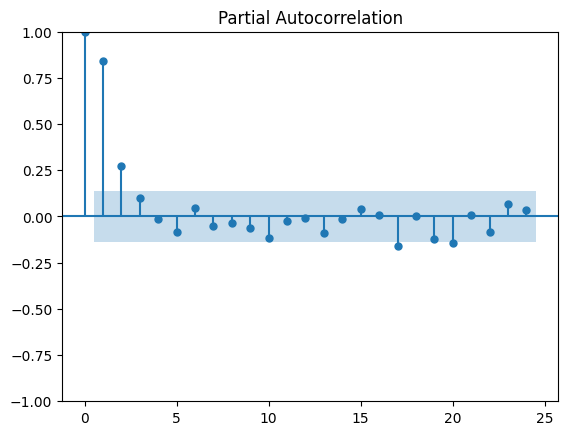

In [4]:
#Do the model again with the weekly sales
#select data from store 1 item 1
selected_store = 1
selected_item = 1
selected_start_date = '2013-01-01'
selected_end_date = '2016-12-31'
selected_test_startdate = '2017-01-01'
selected_test_enddate = '2017-12-31'

#use the date as input and sale as output
selected_store_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['date']
selected_store_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['sales']
selected_store_test_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_test_startdate) & (df_train['date'] <= selected_test_enddate)]['date']
selected_store_test_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_test_startdate) & (df_train['date'] <= selected_test_enddate)]['sales']

#preview of the data, uncomment to see
#print(selected_store_date)
#print(selected_store_sales)

#Train data--------------------------------------------
#create train_sales_data as dataframe from selected_store_date and selected_store_sales
train_sales_data = {'date': selected_store_date, 'sales': selected_store_sales}
#convert into pandas's dataframe
train_sales_data=pd.DataFrame(train_sales_data)
#correct the date into datetime type
train_sales_data['date']=pd.to_datetime(train_sales_data['date'])

#get weekly sales data for train
train_resample = train_sales_data.set_index('date')
weekly_sales = train_resample.resample('W').mean()

#Test data---------------------------------------------
test_sales_data = {'date': selected_store_test_date, 'sales': selected_store_test_sales}
#convert into pandas's dataframe
test_sales_data = pd.DataFrame(test_sales_data)
#correct the date into datetime type
test_sales_data['date']=pd.to_datetime(test_sales_data['date'])

#get weekly sales data for test
test_resample = test_sales_data.set_index('date')
test_weekly_sales = test_resample.resample('W').mean()

#plot to see the weekly data
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['sales'], linewidth=3,c='cyan', label='Train')
plt.plot(test_weekly_sales['sales'],linewidth=3,c='red',label='Test')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

#check stationarity
check_stationarity(weekly_sales['sales'])

#see the ACF and PACF plot
plot_acf(weekly_sales)
plot_pacf(weekly_sales)
plt.show()

#Weekly sales SARIMA with optimizing the parameters

---



create the for loop for finding the best parameters (p, d, q, P, D, Q) but s remain 52
- make the function for SARIMA to fit, predict, and evaluate
- Compare the R-square (High), MSE (Low), and MAE (Low)
- select the best model's parameter

In [40]:
#bring all the SARIMA fit, predict, evaluate into function.
def sarima_fit_predict_evaluate(p, d, q, P, D, Q, s, weekly_sales, test_weekly_sales):

  model = SARIMAX(weekly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
  results = model.fit()

  # Forecast future values
  forecast_periods = (52)  # Forecast the next 12 weeks ~ 3 months
  forecast = results.get_forecast(steps=forecast_periods)
  forecast_mean = forecast.predicted_mean
  forecast_ci = forecast.conf_int()
  #get ste from forecast
  forecast_ste = forecast.se_mean

  #evaluate the prediction
  observed = test_weekly_sales[-forecast_periods:]
  mae = mean_absolute_error(observed, forecast_mean)
  mse = mean_squared_error(observed, forecast_mean)
  r2 = r2_score(observed, forecast_mean)
  rmse = np.sqrt(mse)

  #SD of error
  error = forecast_mean - observed['sales']
  sd_error = np.std(error)

  return mae, mse, r2, rmse, sd_error


In [41]:
#data frame for storing the mae, mse, r2, rmse, sd_error with p, d, q
metrics_df = pd.DataFrame(columns=['p', 'd', 'q', 'P', 'D', 'Q', 's', 'mae', 'mse', 'r2', 'rmse', 'sd_error'], index=range(50))
locindex = 0

#for loop through p, d, q with start values from 1 to 3 for each
for p in range(1, 4):
  for d in range(1, 4):
    for q in range(1, 4):
      mae, mse, r2, rmse, sd_error = sarima_fit_predict_evaluate(p,d,q,1,1,1,52,weekly_sales,test_weekly_sales)
      metrics_df.loc[locindex] = [p, d, q, 1, 1, 1, 52, mae, mse, r2, rmse, sd_error]
      locindex += 1
      print(f'p: {p}, d: {d}, q: {q}')

#remove the empry index of metrics_df
metrics_df = metrics_df.dropna()
print(metrics_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 1, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 1, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 1, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 2, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 2, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 2, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 3, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 3, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 1, d: 3, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 2, d: 1, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 1, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 1, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 2, d: 2, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 2, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 2, d: 2, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 2, d: 3, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 2, d: 3, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 3, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 3, d: 1, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 1, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 1, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 3, d: 2, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 3, d: 2, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 2, q: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


p: 3, d: 3, q: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 3, q: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 3, q: 3
    p  d  q  P  D  Q   s        mae          mse          r2       rmse  \
0   1  1  1  1  1  1  52   1.603791      4.36663     0.77932   2.089648   
1   1  1  2  1  1  1  52   1.611665     4.393411    0.777967   2.096047   
2   1  1  3  1  1  1  52   1.581266     4.290415    0.783172   2.071332   
3   1  2  1  1  1  1  52   2.255808      7.55142    0.618368   2.747985   
4   1  2  2  1  1  1  52   1.518412     3.982479    0.798735   1.995615   
5   1  2  3  1  1  1  52   1.520228     3.989802    0.798364   1.997449   
6   1  3  1  1  1  1  52  12.842343   188.257259   -8.514096  13.720687   
7   1  3  2  1  1  1  52   1.681807     4.528472    0.771141   2.128021   
8   1  3  3  1  1  1  52   1.605867     4.145497    0.790496   2.036049   
9   2  1  1  1  1  1  52   1.573593     4.263367    0.784539   2.064792   
10  2  1  2  1  1  1  52   1.578608     4.282716    0.783561   2.069472   
11  2  1  3  1  1  1  52   1.606835     4.388409     0.77822   2.094853   
12  2  2

In [42]:
#print metrics_df orderby r2 column only first 5 rows
metrics_df_r2sorted = metrics_df.sort_values(by=['r2'], ascending=False)
print(metrics_df_r2sorted.head(5))


    p  d  q  P  D  Q   s       mae       mse        r2      rmse  sd_error
23  3  2  3  1  1  1  52  1.496822  3.916394  0.802074  1.978988  1.955987
13  2  2  2  1  1  1  52   1.50963  3.947497  0.800502  1.986831   1.95839
4   1  2  2  1  1  1  52  1.518412  3.982479  0.798735  1.995615  1.957621
14  2  2  3  1  1  1  52  1.518779  3.983713  0.798672  1.995924  1.957908
5   1  2  3  1  1  1  52  1.520228  3.989802  0.798364  1.997449  1.958668


We saw that the p, d, q, 3, 2, 3 gave the best metrics suggesting the optimal parameters.


In [43]:
#sarima model train
#assign parameters
p, d, q = 3, 2, 3
P, D, Q, s = 1, 1, 1, 52  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(weekly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

#print results information
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                  209
Model:             SARIMAX(3, 2, 3)x(1, 1, [1], 52)   Log Likelihood                -342.213
Date:                              Thu, 09 Jan 2025   AIC                            702.426
Time:                                      06:30:41   BIC                            729.817
Sample:                                  01-06-2013   HQIC                           713.552
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0189      0.155     -6.561      0.000      -1.323      -0.715
ar.L2         -0.10

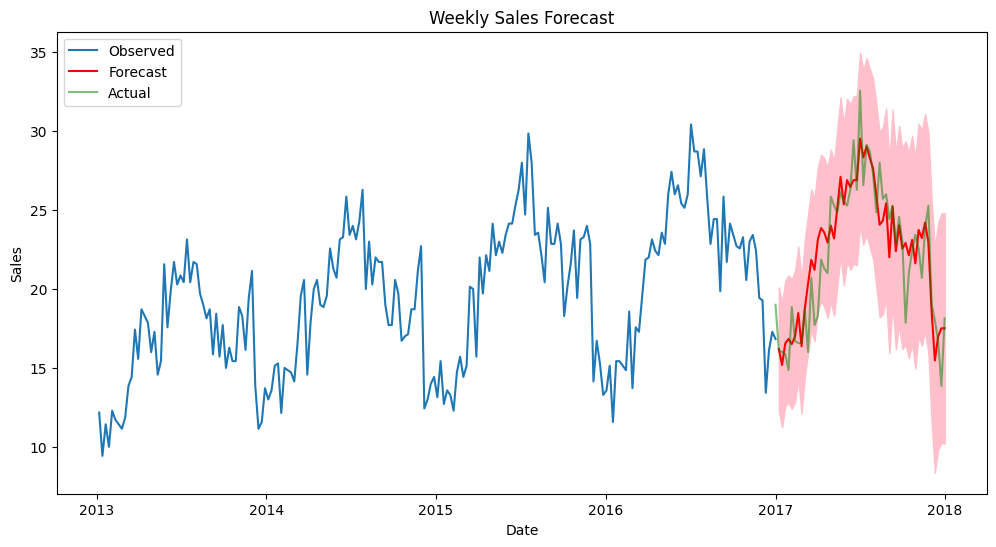

MAE: 1.4968218661031805
MSE: 3.9163943840949567
R2: 0.8020742876385747


In [44]:
# Forecast future values
forecast_periods = (52)  # Forecast the next 12 weeks ~ 3 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
#get ste from forecast
forecast_ste = forecast.se_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.plot(test_weekly_sales, label='Actual', color='green', alpha=0.5)
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='upper left')
plt.show()


#evaluate the prediction
observed = test_weekly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
r2 = r2_score(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')